Linear Regression one output one feature <br>
Link: https://builtin.com/data-science/linear-regression-tensorflow

In [ ]:
import tensorflow as tf

import numpy as np

rng = np.random

In [ ]:
X= np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654, 9.27,3.1])

Y=np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221, 2.827,3.465,1.65,2.904,2.42,2.94,1.3])

n_samples = Y.shape[0]
print(n_samples)

17


In [ ]:
learning_rate = 0.01

epochs = 1000

display_step = 50

In [ ]:
# Weight and Bias initialized randomly.

W = tf.Variable(rng.randn(), name="weight")

b = tf.Variable(rng.randn(), name="bias")
print(b)

<tf.Variable 'bias:0' shape=() dtype=float32, numpy=0.6158712>


In [ ]:
# Linear regression (Wx + b).

def linear_regression(x):

    return W * x + b

# Mean square error.

def mean_square(y_pred, y_true):

    return tf.reduce_sum(tf.pow(y_pred-y_true, 2)) / (2 * n_samples)

In [ ]:
# Stochastic Gradient Descent Optimizer

optimizer = tf.optimizers.SGD(learning_rate)


# Optimization process. 

def run_optimization():
  # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
    # Compute gradients.
    gradients = g.gradient(loss, [W, b])
    print(gradients)

    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [ ]:
# Run training for the given number of steps.

for step in range(1, epochs + 1):

    # Run the optimization to update W and b values.

    run_optimization()

  
    pred = linear_regression(X)

    loss = mean_square(pred, Y)

    #print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

[<tf.Tensor: shape=(), dtype=float32, numpy=1.31726265e-05>, <tf.Tensor: shape=(), dtype=float32, numpy=-9.454973e-05>]
[<tf.Tensor: shape=(), dtype=float32, numpy=1.418218e-05>, <tf.Tensor: shape=(), dtype=float32, numpy=-9.429082e-05>]
[<tf.Tensor: shape=(), dtype=float32, numpy=1.3586134e-05>, <tf.Tensor: shape=(), dtype=float32, numpy=-9.4270334e-05>]
[<tf.Tensor: shape=(), dtype=float32, numpy=1.2718141e-05>, <tf.Tensor: shape=(), dtype=float32, numpy=-9.4257295e-05>]
[<tf.Tensor: shape=(), dtype=float32, numpy=1.3448298e-05>, <tf.Tensor: shape=(), dtype=float32, numpy=-9.405054e-05>]
[<tf.Tensor: shape=(), dtype=float32, numpy=1.2848526e-05>, <tf.Tensor: shape=(), dtype=float32, numpy=-9.40077e-05>]
[<tf.Tensor: shape=(), dtype=float32, numpy=1.3500452e-05>, <tf.Tensor: shape=(), dtype=float32, numpy=-9.37935e-05>]
[<tf.Tensor: shape=(), dtype=float32, numpy=1.2811273e-05>, <tf.Tensor: shape=(), dtype=float32, numpy=-9.378046e-05>]
[<tf.Tensor: shape=(), dtype=float32, numpy=1.34

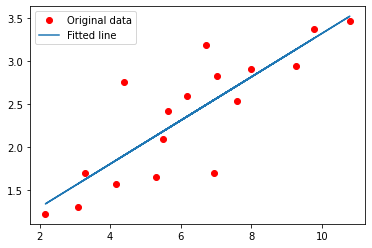

In [ ]:
import matplotlib.pyplot as plt

# Graphic display

plt.plot(X, Y, 'ro', label='Original data')

plt.plot(X, np.array(W * X + b), label='Fitted line')

plt.legend()

plt.show()